# Thư viện

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import numpy as np

# Đọc và xem trước 5 dòng dữ liệu

In [2]:
tracks_read = pd.read_csv('track.csv')

In [3]:
tracks_read.head(5)

,track_id,track_name,url,datetime,track_tag,track_play,track_like,track_repost
0,24169,Friday Feel Good Quick Mix ~ We R Famlily 70's...,https://www.soundcloud.com/mix966fm/friday-fee...,2013-10-10T17:26:49.000Z,Disco,7610,136,6
1,10804,DJ Pajik[CDJ™] FT DJ BCD [CDJ™ ] ~ DJ KESAYANG...,https://www.soundcloud.com/fajri-gunawan-88560...,2020-07-04T15:12:33.000Z,funkot,6118,171,5
2,12911,Rooh Ya Hawa روح يا هوى,https://www.soundcloud.com/rock-real/rooh-ya-hawa,2012-01-08T09:45:28.000Z,NaN,13237,186,36
3,25944,"Nejla Belhaj Ft Azaiez Yacine - Asfour ""عصفور ...",https://www.soundcloud.com/y-a-1/nejla-belhaj-...,2015-02-08T22:31:54.000Z,Cover,95621,2516,462
4,12981,شهاب حسنى بحبك وبس,https://www.soundcloud.com/jeelmusic8090/zamrh...,2015-07-26T18:58:01.000Z,walid aly,202192,3904,45


# Số lượng dòng và cột

In [4]:
tracks_read.shape

(1036, 8)

Như vậy, dữ liệu có 1036 dòng và 8 cột

# Ý nghĩa các cột

Nội dung và ý nghĩa từng cột
- track_id: mã id từng track
- track_name: tên của track
- url: đường dẫn liên kết đến website
- datetime: ngày xuất bản
- track_tag: thể loại của track
- track_plat: thời gian, độ dài
- track_like: số lượng người thích
- track_repost: số lượng người đăng lại

# Kiểu dữ liệu

In [5]:
tracks_read.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1036 entries, 0 to 1035
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   track_id      1036 non-null   int64 
 1   track_name    1036 non-null   object
 2   url           1036 non-null   object
 3   datetime      1036 non-null   object
 4   track_tag     644 non-null    object
 5   track_play    1036 non-null   int64 
 6   track_like    1036 non-null   int64 
 7   track_repost  1036 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 64.9+ KB


# Hiển thị ra các thông số như giá trị trung bình, độ lệch chuẩn, min, max và tỷ lệ phần trăm của các cột

In [6]:
tracks_read.describe()

,track_id,track_play,track_like,track_repost
count,1036.000000,1.036000e+03,1.036000e+03,1036.000000
mean,13015.160232,1.531258e+06,3.621179e+04,1208.250000
std,7610.863452,4.215300e+06,9.868376e+04,5377.040556
min,38.000000,8.800000e+01,4.000000e+00,1.000000
25%,6640.250000,3.731150e+04,5.720000e+02,24.000000
50%,12791.000000,2.246330e+05,3.848000e+03,134.000000
75%,19394.750000,1.024204e+06,2.432225e+04,762.000000
max,26408.000000,7.220902e+07,1.054419e+06,148942.000000


# Có trùng lắp không

In [7]:
num_duplicated_rows = tracks_read .index.duplicated().sum()
print(num_duplicated_rows)

0


# Số lượng missing

In [8]:
tracks_read.isnull().sum()

track_id          0
track_name        0
url               0
datetime          0
track_tag       392
track_play        0
track_like        0
track_repost      0
dtype: int64

Như vậy chỉ có cột track_tag là bị miss dữ liệu

# Xử lý nan

In [9]:
tracks_read = tracks_read.fillna("Missing")

kiểm tra lại

In [10]:
tracks_read.isnull().sum()

track_id        0
track_name      0
url             0
datetime        0
track_tag       0
track_play      0
track_like      0
track_repost    0
dtype: int64

# Data Outliers

Ở đây team sẽ check ở 3 cột: track_play, track_like và track_repost

<li>Đầu tiên track_play.</li>

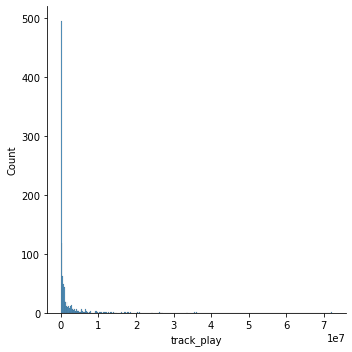

In [11]:
sns.displot(tracks_read['track_play'])

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='track_play'>

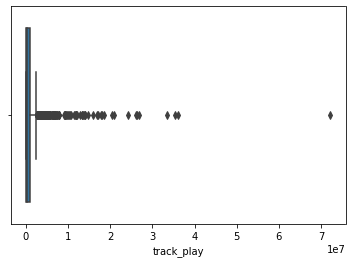

In [12]:
sns.boxplot(tracks_read['track_play'])

In [13]:
# find the limits
upper_limit = tracks_read['track_play'].mean() + 3*tracks_read['track_play'].std()
lower_limit = tracks_read['track_play'].mean() - 3*tracks_read['track_play'].std()
print('upper limit:', upper_limit)
print('lower limit:', lower_limit)

upper limit: 14177159.377218971
lower limit: -11114643.230500823


In [14]:
# find the outliers
tracks_read.loc[(tracks_read['track_play'] > upper_limit) | (tracks_read['track_play'] < lower_limit)]

,track_id,track_name,url,datetime,track_tag,track_play,track_like,track_repost
95,21104,Still Cold / Pathway Private,https://www.soundcloud.com/night_lovell/still-...,2015-03-09T00:20:37.000Z,scpp,14710699,204465,13409
227,10125,AFROTO - FAR2 KHEBRA (عفروتو - فرق خبرة (الاغن...,https://www.soundcloud.com/rammygamal/afroto-f...,2021-11-04T12:33:27.000Z,World,17871305,482034,3094
346,5397,Sherine Abdel Wahab | شيرين عبد الوهاب - أغاني...,https://www.soundcloud.com/free-music-egypt/sh...,2016-11-19T11:21:18.000Z,World,18584712,668090,12440
390,7629,ادهم نابلسي | شدني غمرني,https://www.soundcloud.com/zeka-music-ar/11eze...,2017-10-10T12:58:45.000Z,Missing,17136942,435563,7143
450,2824,اديني رجعتلك - عمرو دياب,https://www.soundcloud.com/megaalalmy/amr-diab...,2015-03-17T18:00:47.000Z,Amr,20970558,478193,8811
473,7481,اغنية اصالة - 60 دقيقة حياة 2015 | النسخه الاصليه,https://www.soundcloud.com/hawssa2/60-2015a,2015-03-21T12:19:24.000Z,اصالة,24198790,669528,11243
530,7577,رامي جمال - فترة مش سهلة Ramy Gamal - Fatra ...,https://www.soundcloud.com/mohamed-kabeel/ramy...,2013-10-08T16:54:25.000Z,New,16027505,460091,10264
577,7453,Wegz - KEDA KEDA ويجز - كدا كدا,https://www.soundcloud.com/no-r-992488867/wegz...,2019-07-13T10:28:33.000Z,Missing,26905387,664757,4423
645,2562,حسام حبيب - شايف نفسى فيك - البوم فرق كتير,https://www.soundcloud.com/user-130191386/u7vk...,2016-10-21T03:47:09.000Z,Missing,16960283,504541,14143
753,486,كارمن سليمان - لما تشوفك عيني | Carmen Solima...,https://www.soundcloud.com/carmensolimanoffici...,2016-07-03T23:14:57.000Z,Classical,35475283,951706,31990


In [15]:
# trimming - delete the outlier data
new_df = tracks_read.loc[(tracks_read['track_play'] <= upper_limit) & (tracks_read['track_play'] >= lower_limit)]
print('before removing outliers:', len(tracks_read))
print('after removing outliers:',len(new_df))
print('outliers:', len(tracks_read)-len(new_df))

before removing outliers: 1036
after removing outliers: 1019
outliers: 17


<li>Tiếp đến track_like.</li>

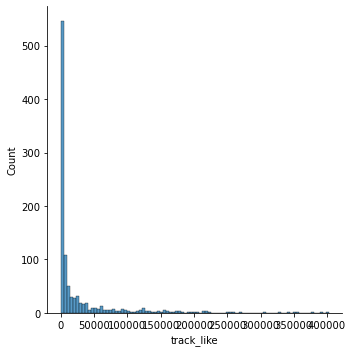

In [16]:
sns.displot(new_df['track_like'])

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='track_like'>

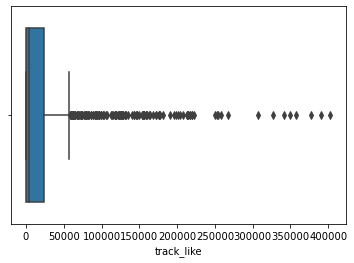

In [17]:
sns.boxplot(new_df['track_like'])

In [18]:
# find the limits
upper_limit = new_df['track_like'].mean() + 3*new_df['track_like'].std()
lower_limit = new_df['track_like'].mean() - 3*new_df['track_like'].std()
print('upper limit:', upper_limit)
print('lower limit:', lower_limit)

upper limit: 189296.4365800495
lower limit: -136719.01165365108


In [20]:
# find the outliers
new_df.loc[(new_df['track_like'] > upper_limit) | (new_df['track_like'] < lower_limit)]

,track_id,track_name,url,datetime,track_tag,track_play,track_like,track_repost
10,8211,دلع البنوتة - مسلسل دلع بنات - غناء عزيزة,https://www.soundcloud.com/7adota7/qvlxvhbi9lxh,2014-06-25T23:47:11.000Z,دلع_بنات,9252005,214546,9381
11,14439,مواويل رضا البحراوي وعبسلام بداري الأه & انا ا...,https://www.soundcloud.com/slah-trika/2016a,2015-11-23T15:36:38.000Z,مواويل,14126978,402678,6104
12,7641,Mohamed El Sharnouby - Heta Men El Khayal | مح...,https://www.soundcloud.com/earthproductionst/m...,2019-03-29T01:21:49.000Z,Pop,12755767,307105,2917
30,16234,Majid Almohandis Bahebak( ماجد المهندس بحبك ...,https://www.soundcloud.com/mohamed-ashraf-sala...,2019-02-03T12:27:56.000Z,Missing,9366863,207680,2214
132,5337,تامر عاشور باينة ضاع,https://www.soundcloud.com/pk-29/jxw2u4shil81,2013-09-16T04:24:48.000Z,Arabic,7458862,219286,3877
162,16477,على مين الملامه ..شرين .. كامله,https://www.soundcloud.com/ariqamzyvrs/zfkuga3...,2015-07-10T00:00:37.000Z,شرين,6893205,217497,6175
215,1546,نانسى عجرم - يا بنات,https://www.soundcloud.com/music-fc/pysezdwfmw80,2012-09-25T15:41:03.000Z,http://www.facebook.com/pages/%D8%A7%D8%,13287614,356885,16606
262,13593,Steve Aoki & Louis Tomlinson - Just Hold On,https://www.soundcloud.com/steveaoki/steve-aok...,2016-12-10T19:57:30.000Z,Dance & EDM,13487778,195476,11593
288,4544,اياد جيان | دنيته وحشانى,https://www.soundcloud.com/zeka-music-3/eyad-j...,2016-07-27T00:38:48.000Z,Missing,7844900,213672,6499
290,2310,الركن البعيد الهادى - أنغام,https://www.soundcloud.com/walid-gerges/s9pn9y...,2012-08-19T00:07:42.000Z,Missing,7719128,214475,10213


In [21]:
new_dff = new_df.loc[(new_df['track_like'] <= upper_limit) & (new_df['track_like'] >= lower_limit)]
print('before removing outliers:', len(new_df))
print('after removing outliers:',len(new_dff))
print('outliers:', len(new_df)-len(new_dff))

before removing outliers: 1019
after removing outliers: 991
outliers: 28


In [22]:
new_dff.head(5)

,track_id,track_name,url,datetime,track_tag,track_play,track_like,track_repost
0,24169,Friday Feel Good Quick Mix ~ We R Famlily 70's...,https://www.soundcloud.com/mix966fm/friday-fee...,2013-10-10T17:26:49.000Z,Disco,7610,136,6
1,10804,DJ Pajik[CDJ™] FT DJ BCD [CDJ™ ] ~ DJ KESAYANG...,https://www.soundcloud.com/fajri-gunawan-88560...,2020-07-04T15:12:33.000Z,funkot,6118,171,5
2,12911,Rooh Ya Hawa روح يا هوى,https://www.soundcloud.com/rock-real/rooh-ya-hawa,2012-01-08T09:45:28.000Z,Missing,13237,186,36
3,25944,"Nejla Belhaj Ft Azaiez Yacine - Asfour ""عصفور ...",https://www.soundcloud.com/y-a-1/nejla-belhaj-...,2015-02-08T22:31:54.000Z,Cover,95621,2516,462
4,12981,شهاب حسنى بحبك وبس,https://www.soundcloud.com/jeelmusic8090/zamrh...,2015-07-26T18:58:01.000Z,walid aly,202192,3904,45


<li>Kế tiếp là track_repost.</li>

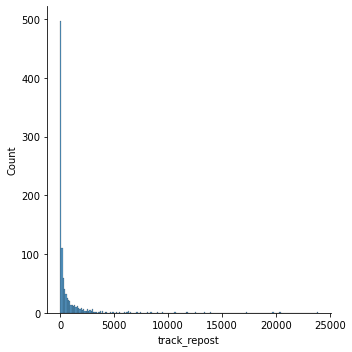

In [23]:
sns.displot(new_dff['track_repost'])

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='track_repost'>

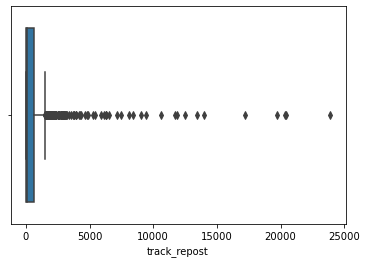

In [24]:
sns.boxplot(new_dff['track_repost'])

In [25]:
# find the limits
upper_limit = new_dff['track_repost'].mean() + 3*new_dff['track_repost'].std()
lower_limit = new_dff['track_repost'].mean() - 3*new_dff['track_repost'].std()
print('upper limit:', upper_limit)
print('lower limit:', lower_limit)

upper limit: 6762.533117838671
lower limit: -5297.570453862889


In [26]:
df = new_dff.loc[(new_dff['track_repost'] <= upper_limit) & (new_dff['track_repost'] >= lower_limit)]
print('before removing outliers:', len(new_dff))
print('after removing outliers:',len(df))
print('outliers:', len(new_dff)-len(df))

before removing outliers: 991
after removing outliers: 974
outliers: 17


In [27]:
df.shape

(974, 8)

# Visualize

## Top 10 thể loại phổ biến nhất

In [46]:
top_genre= df.sort_values('track_tag', ascending=False)
top_genre = top_genre['track_tag'].value_counts().rename_axis('track_tag').reset_index(name='counts')
top_genre = top_genre.drop(top_genre[top_genre['track_tag']=='Missing'].index)
top_genre.head(10)

,track_tag,counts
1,World,24
2,Reggae,15
3,VlogMusic,15
4,Comedy,14
5,Arabic,13
6,Pop,11
7,House,11
8,Soundtrack,11
9,Deep House,9
10,Dance & EDM,9


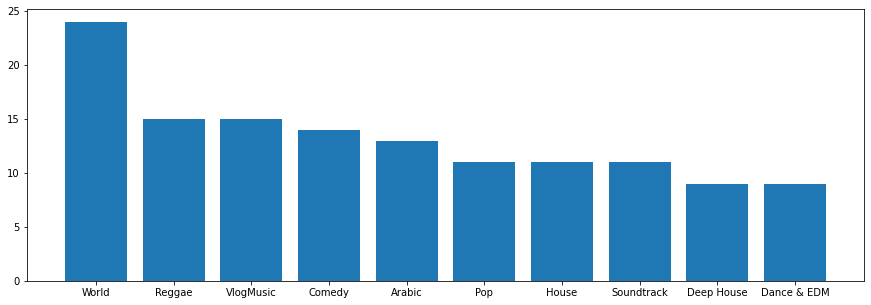

In [33]:
plt.figure(figsize=(15,5))
plt.bar(top_genre.head(10)['track_tag'],top_genre.head(10)['counts'])
plt.show()

## Có phải số lượng tracks phổ biến gần đây đều là những tracks mới được phát hành không?

In [35]:
dates_tracks = df['datetime'].squeeze()
dates_tracks = pd.to_datetime(dates_tracks, format='%Y-%m-%d %H:%M:%S')
years = dates_tracks.dt.year

years_tracks = years.value_counts().rename_axis('datetime').reset_index(name='frequency')

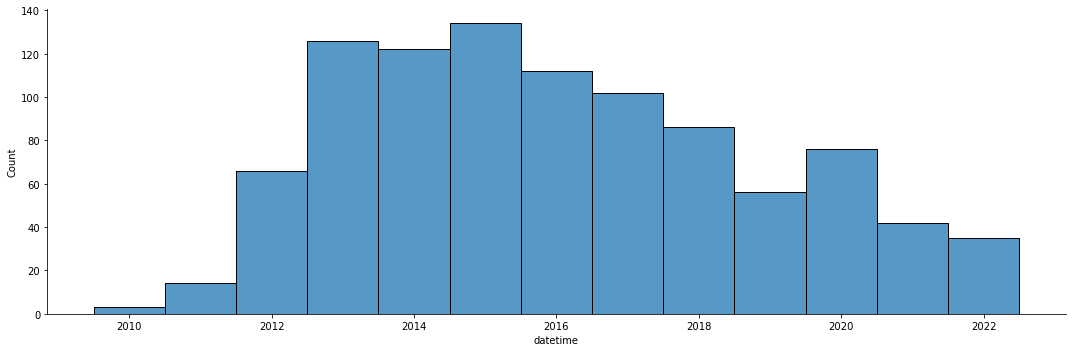

In [36]:
sns.displot(years, discrete=True, aspect=3)
plt.show()

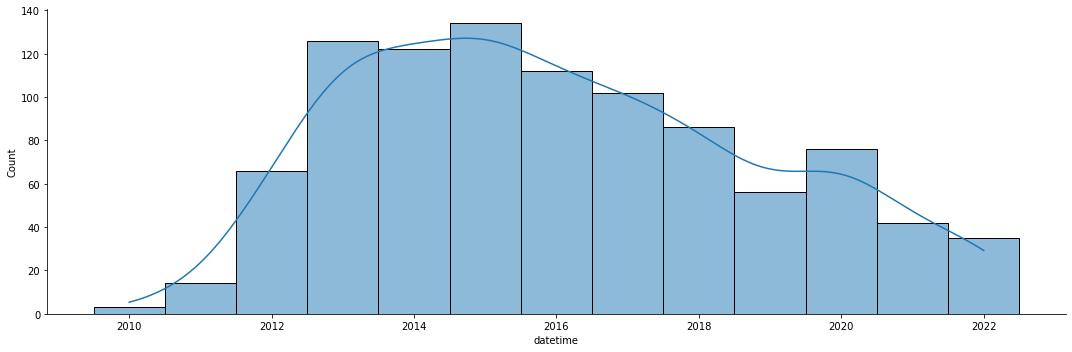

In [37]:
sns.displot(years, discrete=True, aspect=3, kde=True)

<b>Nhìn vào biểu đồ: </b>
<ul>
<li>Câu trả lời là không. Ta dễ dàng nhìn thấy từ 2020 có xu hướng giảm dần tới 2022 và có xướng tiếp tục giảm.</li>
<li>Phần lớn tracks được phát hành tập trung trong năm 2013, 2014 và 2015. Trong đó 2015 là cao nhất.</li>
<li>Năm 2010 là năm ít upload nhất.</li>
</ul>

<AxesSubplot:ylabel='frequency'>

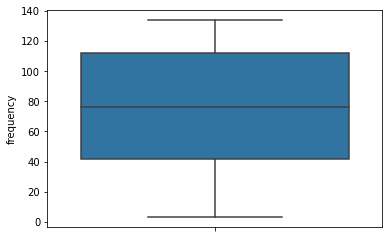

In [39]:
sns.boxplot(y='frequency', data=years_tracks)

<b>Nhận xét: </b>
<ul>
<li>Một nửa số năm có lượng tracks phát hành trên 78.</li>
<li>75% các năm có lượng tracks phát hành từ 40 trở lên .</li>
</ul>

## Các tracks đăng lại (repost) có ảnh hưởng đến lượt nghethích (like) và thời gian không (play) không

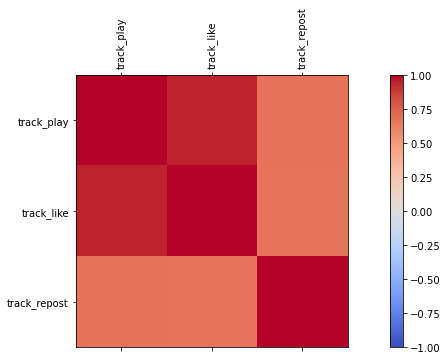

In [73]:
h = df[['track_play', 'track_like', 'track_repost']]

corr = h.corr()
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(h.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(h.columns)
ax.set_yticklabels(h.columns)
plt.show()

<b>Nhìn vào biểu đồ: </b>
<li>Ta thấy được bài hát (track) đăng lại đều tác động đến thời gian (track_play) và lượt thích (track_like).</li>
<li>Đồng thời ta cũng thấy một số tương quan khác.</li>

## Các lượt thích (track_like), đăng lại (track_repost) và thời gian (track_play) có những mối liên quan đến nhau hay không.

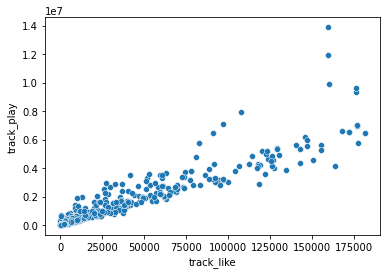

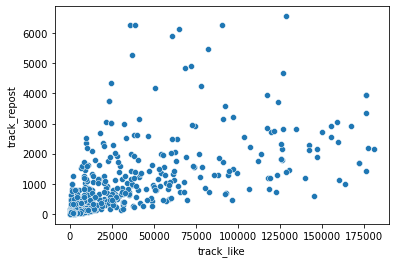

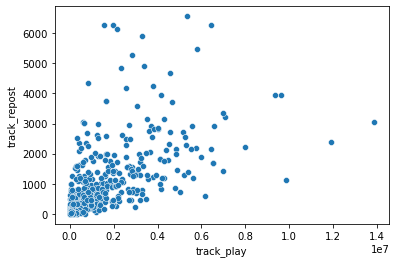

In [75]:
sns.scatterplot(data=h, x="track_like", y="track_play")
plt.show()
sns.scatterplot(data=h, x="track_like", y="track_repost")
plt.show()
sns.scatterplot(data=h, x="track_play", y="track_repost")
plt.show()

<AxesSubplot:xlabel='track_like', ylabel='track_tag'>

C:\Users\Asus\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 24314 (\N{CJK UNIFIED IDEOGRAPH-5EFA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Asus\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 32184 (\N{CJK UNIFIED IDEOGRAPH-7DB8}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Asus\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 23067 (\N{CJK UNIFIED IDEOGRAPH-5A1B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Asus\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 27138 (\N{CJK UNIFIED IDEOGRAPH-6A02}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Asus\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 24930 (\N{CJK UNIFIED IDEOGRAPH-6162}) missing from current font.
  fig.canvas.print_figure(bytes_io, *

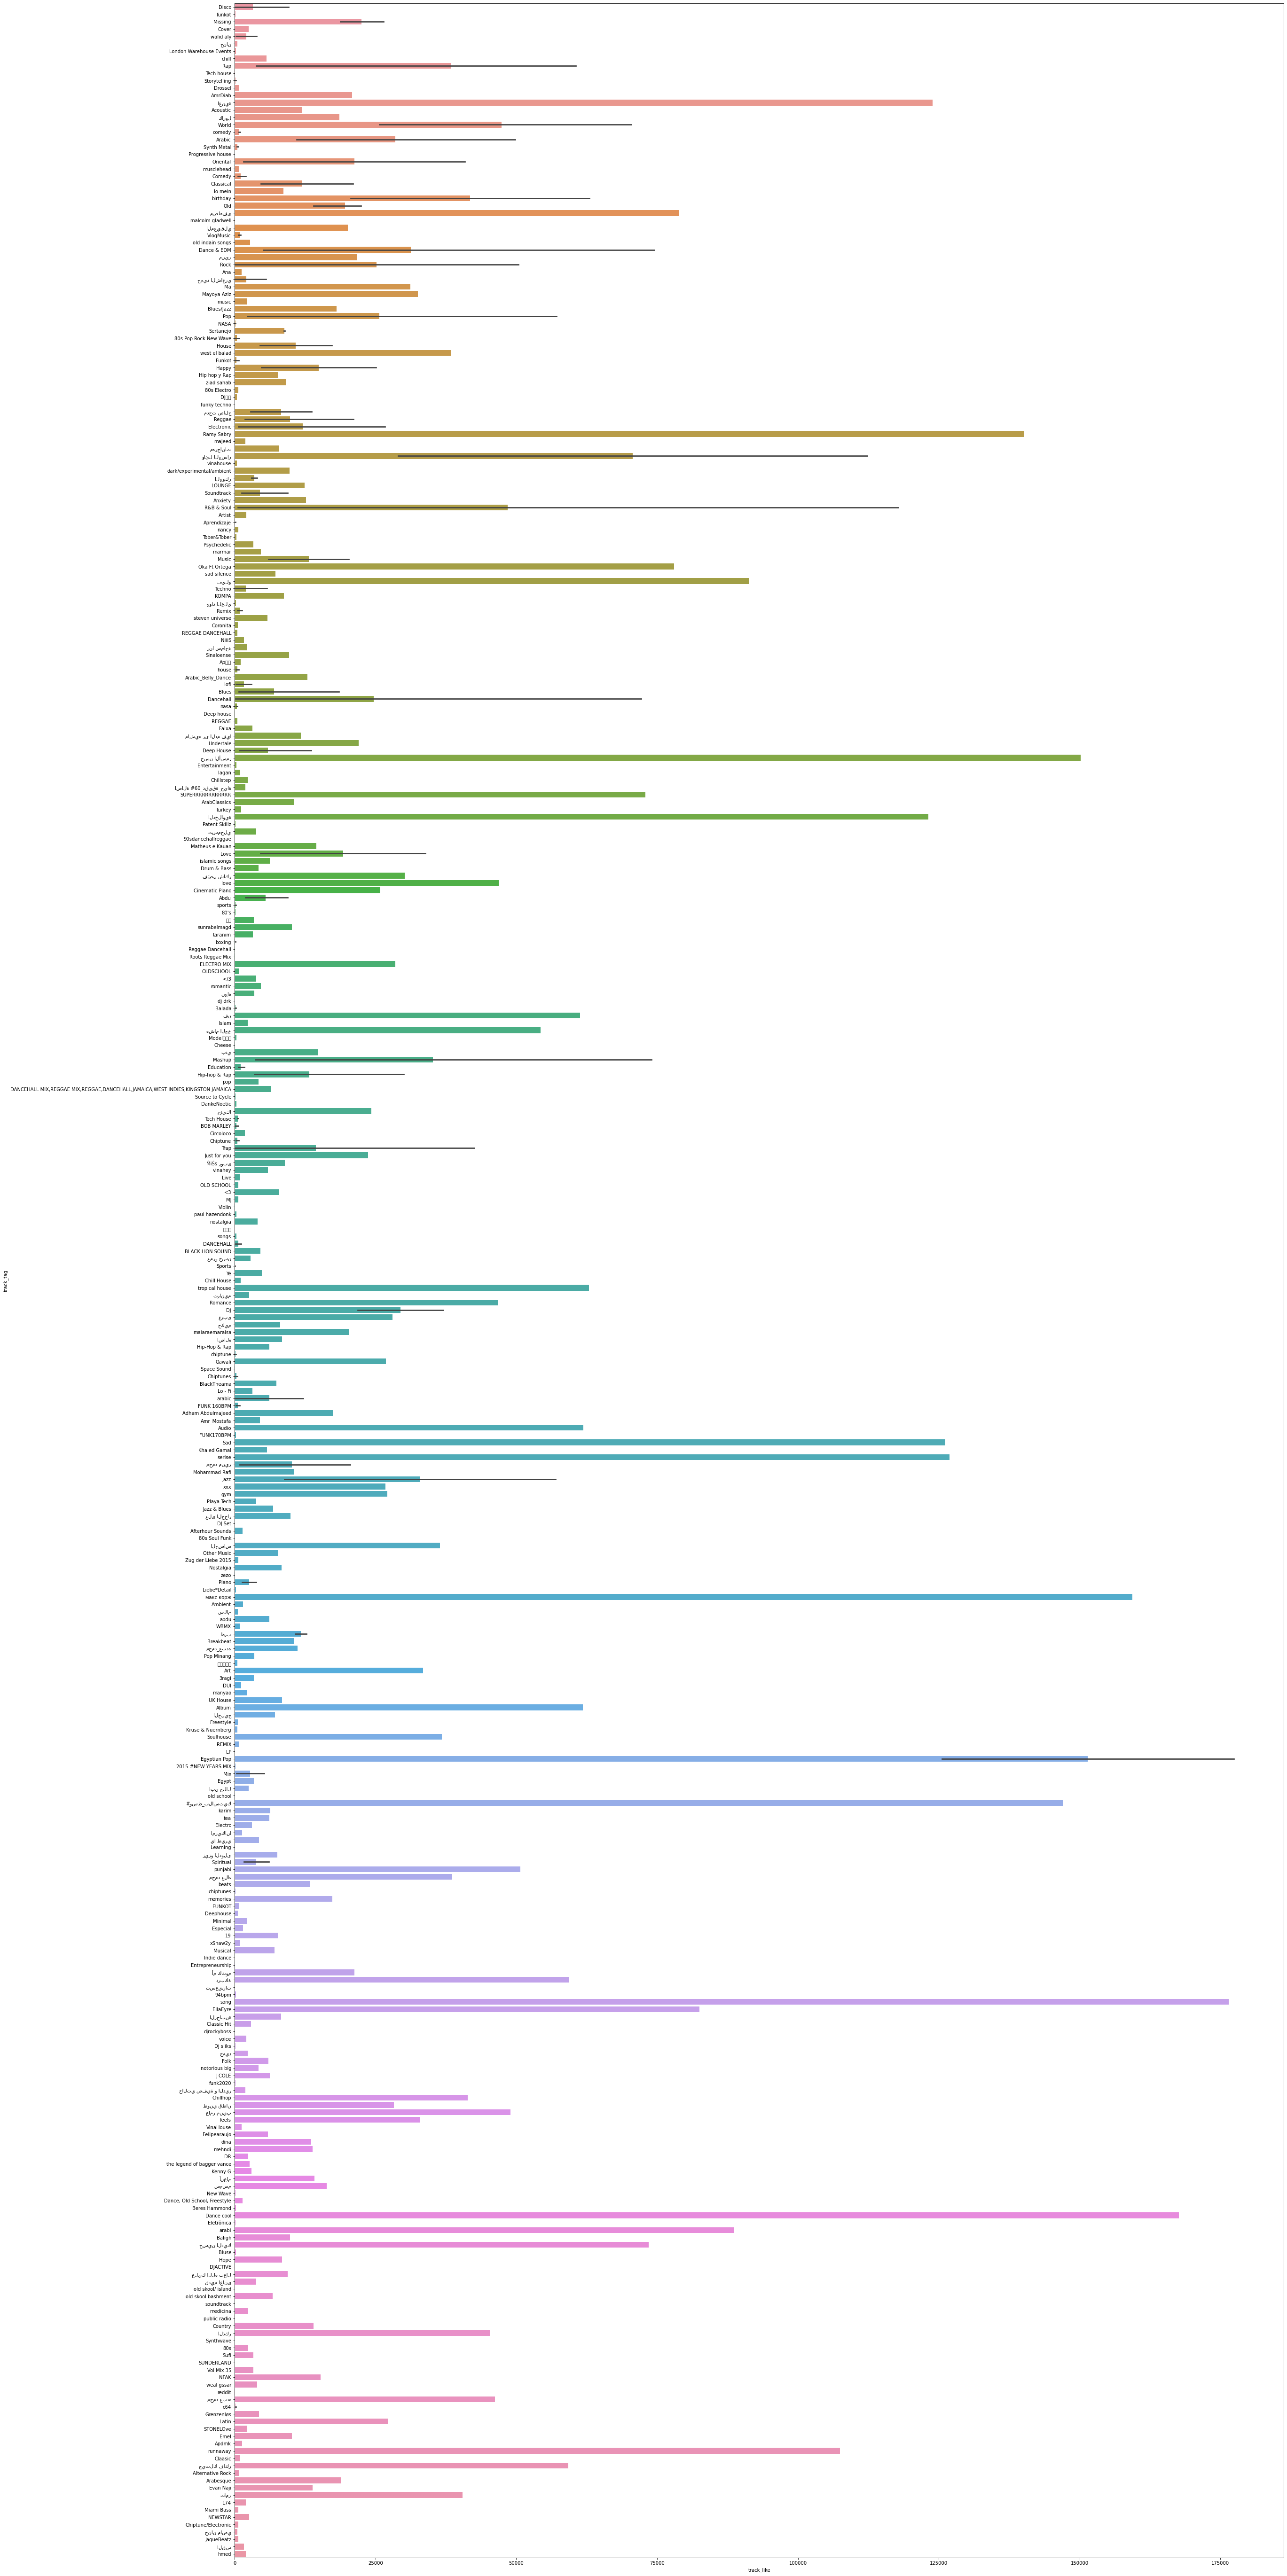

In [80]:
plt.figure(figsize=(40,100))
temp = df
sns.barplot(y="track_tag", x='track_like', data=temp[['track_tag', 'track_like']])

In [81]:
df.head(3)

,track_id,track_name,url,datetime,track_tag,track_play,track_like,track_repost
0,24169,Friday Feel Good Quick Mix ~ We R Famlily 70's...,https://www.soundcloud.com/mix966fm/friday-fee...,2013-10-10T17:26:49.000Z,Disco,7610,136,6
1,10804,DJ Pajik[CDJ™] FT DJ BCD [CDJ™ ] ~ DJ KESAYANG...,https://www.soundcloud.com/fajri-gunawan-88560...,2020-07-04T15:12:33.000Z,funkot,6118,171,5
2,12911,Rooh Ya Hawa روح يا هوى,https://www.soundcloud.com/rock-real/rooh-ya-hawa,2012-01-08T09:45:28.000Z,Missing,13237,186,36
